In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from cryptoaml.utils import read_pickle
from scipy.stats import friedmanchisquare
from Orange.evaluation.scoring import compute_CD
from Orange.evaluation.scoring import graph_ranks

import scipy as sp
import scipy.stats as st

In [2]:
def friedman_test(df_perf):
    
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['model']).size()}).reset_index()
    
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['model'])
    
    # test the null hypothesis using friedman before doing a post-hoc analysis
    stat, p  = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['model'] == c]['score'])
        for c in classifiers))
    
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
        return False
    else:
        print('Different distributions (reject H0)')
        return True 
        
def stat_test(results, filename):
    reject_h0 = friedman_test(results)
    if reject_h0:
        results["ranks"] = results.groupby("dataset_name").rank(ascending=False)
        results_avg_ranks = results.groupby("model")["ranks"].mean().to_dict()
        classifiers = list(results_avg_ranks.keys())
        avg_ranks = list(results_avg_ranks.values())
        n_datasets = results["dataset_name"].nunique()
        critical_diff = compute_CD(
            avg_ranks, 
            n=n_datasets, 
            alpha="0.05", 
            test="nemenyi"
        )
        print("Critical difference used for statistically significance: {}".format(round(critical_diff,3)))
        graph_ranks(
            avg_ranks, 
            classifiers, 
            cd=critical_diff, 
            width=10, 
            textspace=1.5,
            filename=filename
        )
        plt.show()

In [24]:
exp1_accuracy = [
    {"model":"XGB", "score": 0.976, "dataset_name": "ell_LF" },
    {"model":"XGB", "score": 0.977, "dataset_name": "ell_LF_NE" },
    {"model":"XGB", "score": 0.978, "dataset_name": "ell_AF" },
    {"model":"XGB", "score": 0.979, "dataset_name": "ell_AF_NE" },
    {"model":"XGB", "score": 0.984, "dataset_name": "eth" },
    {"model":"XGB", "score": 0.785, "dataset_name": "noaa" },

    {"model":"LGBM", "score": 0.975, "dataset_name": "ell_LF" },
    {"model":"LGBM", "score": 0.978, "dataset_name": "ell_LF_NE" },
    {"model":"LGBM", "score": 0.979, "dataset_name": "ell_AF" },
    {"model":"LGBM", "score": 0.979, "dataset_name": "ell_AF_NE" },
    {"model":"LGBM", "score": 0.981, "dataset_name": "eth" },
    {"model":"LGBM", "score": 0.795, "dataset_name": "noaa" },
    
    {"model":"CAT", "score": 0.976, "dataset_name": "ell_LF" },
    {"model":"CAT", "score": 0.978, "dataset_name": "ell_LF_NE" },
    {"model":"CAT", "score": 0.979, "dataset_name": "ell_AF" },
    {"model":"CAT", "score": 0.979, "dataset_name": "ell_AF_NE" },
    {"model":"CAT", "score": 0.980, "dataset_name": "eth" },
    {"model":"CAT", "score": 0.790, "dataset_name": "noaa" },

    {"model":"RF", "score": 0.973, "dataset_name": "ell_LF" },
    {"model":"RF", "score": 0.978, "dataset_name": "ell_LF_NE" },
    {"model":"RF", "score": 0.977, "dataset_name": "ell_AF" },
    {"model":"RF", "score": 0.979, "dataset_name": "ell_AF_NE" },
    {"model":"RF", "score": 0.974, "dataset_name": "eth" },
    {"model":"RF", "score": 0.784, "dataset_name": "noaa" },
]

print("Accuracy Differences")
accuracy_df = pd.DataFrame(data=exp1_accuracy)
stat_test(accuracy_df, "exp1_nemenyi_accuracy.png")

Accuracy Differences
Statistics=6.205, p=0.102
Same distributions (fail to reject H0)


Precision Differences
Statistics=8.492, p=0.037
Different distributions (reject H0)
Critical difference used for statistically significance: 1.915


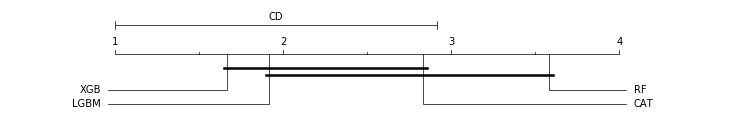

In [25]:
exp1_precision = [
    {"model":"XGB", "score": 0.908, "dataset_name": "ell_LF" },
    {"model":"XGB", "score": 0.982, "dataset_name": "ell_LF_NE" },
    {"model":"XGB", "score": 0.921, "dataset_name": "ell_AF" },
    {"model":"XGB", "score": 0.986, "dataset_name": "ell_AF_NE" },
    
    {"model":"XGB", "score": 0.985, "dataset_name": "eth" },
    {"model":"XGB", "score": 0.749, "dataset_name": "noaa" },

    {"model":"LGBM", "score": 0.888, "dataset_name": "ell_LF" },
    {"model":"LGBM", "score": 0.984, "dataset_name": "ell_LF_NE" },
    {"model":"LGBM", "score": 0.932, "dataset_name": "ell_AF" },
    {"model":"LGBM", "score": 0.985, "dataset_name": "ell_AF_NE" },
    {"model":"LGBM", "score": 0.983, "dataset_name": "eth" },
    {"model":"LGBM", "score": 0.750, "dataset_name": "noaa" },
    
    {"model":"CAT", "score": 0.892, "dataset_name": "ell_LF" },
    {"model":"CAT", "score": 0.975, "dataset_name": "ell_LF_NE" },
    {"model":"CAT", "score": 0.936, "dataset_name": "ell_AF" },
    {"model":"CAT", "score": 0.975, "dataset_name": "ell_AF_NE" },
    {"model":"CAT", "score": 0.981, "dataset_name": "eth" },
    {"model":"CAT", "score": 0.744, "dataset_name": "noaa" },

    {"model":"RF", "score": 0.868, "dataset_name": "ell_LF" },
    {"model":"RF", "score": 0.956, "dataset_name": "ell_LF_NE" },
    {"model":"RF", "score": 0.897, "dataset_name": "ell_AF" },
    {"model":"RF", "score": 0.958, "dataset_name": "ell_AF_NE" },
    {"model":"RF", "score": 0.983, "dataset_name": "eth" },
    {"model":"RF", "score": 0.748, "dataset_name": "noaa" },
]

print("Precision Differences")
precision_df = pd.DataFrame(data=exp1_precision)
stat_test(precision_df, "exp1_nemenyi_precision.png")

In [26]:
exp1_recall = [
    {"model":"XGB", "score": 0.700, "dataset_name": "ell_LF" },
    {"model":"XGB", "score": 0.665, "dataset_name": "ell_LF_NE" },
    {"model":"XGB", "score": 0.732, "dataset_name": "ell_AF" },
    {"model":"XGB", "score": 0.692, "dataset_name": "ell_AF_NE" },
    {"model":"XGB", "score": 0.981, "dataset_name": "eth" },
    {"model":"XGB", "score": 0.596, "dataset_name": "noaa" },

    {"model":"LGBM", "score": 0.702, "dataset_name": "ell_LF" },
    {"model":"LGBM", "score": 0.664, "dataset_name": "ell_LF_NE" },
    {"model":"LGBM", "score": 0.732, "dataset_name": "ell_AF" },
    {"model":"LGBM", "score": 0.695, "dataset_name": "ell_AF_NE" },
    {"model":"LGBM", "score": 0.977, "dataset_name": "eth" },
    {"model":"LGBM", "score": 0.639, "dataset_name": "noaa" },
    
    {"model":"CAT", "score": 0.715, "dataset_name": "ell_LF" },
    {"model":"CAT", "score": 0.672, "dataset_name": "ell_LF_NE" },
    {"model":"CAT", "score": 0.728, "dataset_name": "ell_AF" },
    {"model":"CAT", "score": 0.691, "dataset_name": "ell_AF_NE" },
    {"model":"CAT", "score": 0.977, "dataset_name": "eth" },
    {"model":"CAT", "score": 0.629, "dataset_name": "noaa" },

    {"model":"RF", "score": 0.688, "dataset_name": "ell_LF" },
    {"model":"RF", "score": 0.697, "dataset_name": "ell_LF_NE" },
    {"model":"RF", "score": 0.721, "dataset_name": "ell_AF" },
    {"model":"RF", "score": 0.715, "dataset_name": "ell_AF_NE" },
    {"model":"RF", "score": 0.961, "dataset_name": "eth" },
    {"model":"RF", "score": 0.595, "dataset_name": "noaa" },
]

print("Recall Differences")
recall_df = pd.DataFrame(data=exp1_recall)
stat_test(recall_df, "exp1_nemenyi_recall.png")

Recall Differences
Statistics=1.397, p=0.706
Same distributions (fail to reject H0)


In [27]:
exp1_f1 = [
    {"model":"XGB", "score": 0.790, "dataset_name": "ell_LF" },
    {"model":"XGB", "score": 0.793, "dataset_name": "ell_LF_NE" },
    {"model":"XGB", "score": 0.815, "dataset_name": "ell_AF" },
    {"model":"XGB", "score": 0.813, "dataset_name": "ell_AF_NE" },
    {"model":"XGB", "score": 0.983, "dataset_name": "eth" },
    {"model":"XGB", "score": 0.664, "dataset_name": "noaa" },

    {"model":"LGBM", "score": 0.784, "dataset_name": "ell_LF" },
    {"model":"LGBM", "score": 0.793, "dataset_name": "ell_LF_NE" },
    {"model":"LGBM", "score": 0.820, "dataset_name": "ell_AF" },
    {"model":"LGBM", "score": 0.815, "dataset_name": "ell_AF_NE" },
    {"model":"LGBM", "score": 0.980, "dataset_name": "eth" },
    {"model":"LGBM", "score": 0.690, "dataset_name": "noaa" },
    
    {"model":"CAT", "score": 0.793, "dataset_name": "ell_LF" },
    {"model":"CAT", "score": 0.796, "dataset_name": "ell_LF_NE" },
    {"model":"CAT", "score": 0.819, "dataset_name": "ell_AF" },
    {"model":"CAT", "score": 0.809, "dataset_name": "ell_AF_NE" },
    {"model":"CAT", "score": 0.979, "dataset_name": "eth" },
    {"model":"CAT", "score": 0.682, "dataset_name": "noaa" },

    {"model":"RF", "score": 0.768, "dataset_name": "ell_LF" },
    {"model":"RF", "score": 0.806, "dataset_name": "ell_LF_NE" },
    {"model":"RF", "score": 0.800, "dataset_name": "ell_AF" },
    {"model":"RF", "score": 0.819, "dataset_name": "ell_AF_NE" },
    {"model":"RF", "score": 0.972, "dataset_name": "eth" },
    {"model":"RF", "score": 0.662, "dataset_name": "noaa" },
]

print("F1-Score Differences")
f1_df = pd.DataFrame(data=exp1_f1)
stat_test(f1_df, "exp1_nemenyi_f1.png")

F1-Score Differences
Statistics=1.678, p=0.642
Same distributions (fail to reject H0)


In [28]:
exp1_tnr = [
    {"model":"XGB", "score": 0.9951, "dataset_name": "ell_LF" },
    {"model":"XGB", "score": 0.9991, "dataset_name": "ell_LF_NE" },
    {"model":"XGB", "score": 0.9956, "dataset_name": "ell_AF" },
    {"model":"XGB", "score": 0.9993, "dataset_name": "ell_AF_NE" },
    {"model":"XGB", "score": 0.9867, "dataset_name": "eth" },
    {"model":"XGB", "score": 0.8891, "dataset_name": "noaa" },

    {"model":"LGBM", "score": 0.9939, "dataset_name": "ell_LF" },
    {"model":"LGBM", "score": 0.9993, "dataset_name": "ell_LF_NE" },
    {"model":"LGBM", "score": 0.9963, "dataset_name": "ell_AF" },
    {"model":"LGBM", "score": 0.9993, "dataset_name": "ell_AF_NE" },
    {"model":"LGBM", "score": 0.9853, "dataset_name": "eth" },
    {"model":"LGBM", "score": 0.8816, "dataset_name": "noaa" },
    
    {"model":"CAT", "score": 0.9940, "dataset_name": "ell_LF" },
    {"model":"CAT", "score": 0.9988, "dataset_name": "ell_LF_NE" },
    {"model":"CAT", "score": 0.9965, "dataset_name": "ell_AF" },
    {"model":"CAT", "score": 0.9988, "dataset_name": "ell_AF_NE" },
    {"model":"CAT", "score": 0.9836, "dataset_name": "eth" },
    {"model":"CAT", "score": 0.8800, "dataset_name": "noaa" },

    {"model":"RF", "score": 0.9927, "dataset_name": "ell_LF" },
    {"model":"RF", "score": 0.9978, "dataset_name": "ell_LF_NE" },
    {"model":"RF", "score": 0.9943, "dataset_name": "ell_AF" },
    {"model":"RF", "score": 0.9978, "dataset_name": "ell_AF_NE" },
    {"model":"RF", "score": 0.9854, "dataset_name": "eth" },
    {"model":"RF", "score": 0.8886, "dataset_name": "noaa" },
]

print("TNR Differences")
tnr_df = pd.DataFrame(data=exp1_tnr)
stat_test(tnr_df, "exp1_nemenyi_tnr.png")

TNR Differences
Statistics=6.254, p=0.100
Same distributions (fail to reject H0)


In [8]:
display(precision_df)

,model,score,dataset_name,ranks
0,XGB,0.908,ell_LF,1.0
1,XGB,0.982,ell_LF_NE,2.0
2,XGB,0.921,ell_AF,3.0
3,XGB,0.986,ell_AF_NE,1.0
4,XGB,0.985,eth,1.0
5,XGB,0.749,noaa,2.0
6,LGBM,0.888,ell_LF,3.0
7,LGBM,0.984,ell_LF_NE,1.0
8,LGBM,0.932,ell_AF,2.0
9,LGBM,0.985,ell_AF_NE,2.0


In [9]:
# def friedman_aligned_ranks_test(*args):
#     """
#         Performs a Friedman aligned ranks ranking test.
#         Tests the hypothesis that in a set of k dependent samples groups (where k >= 2) at least two of the groups represent populations with different median values.
#         The difference with a friedman test is that it uses the median of each group to construct the ranking, which is useful when the number of samples is low.
        
#         Parameters
#         ----------
#         sample1, sample2, ... : array_like
#             The sample measurements for each group.
            
#         Returns
#         -------
#         Chi2-value : float
#             The computed Chi2-value of the test.
#         p-value : float
#             The associated p-value from the Chi2-distribution.
#         rankings : array_like
#             The ranking for each group.
#         pivots : array_like
#             The pivotal quantities for each group.
            
#         References
#         ----------
#          J.L. Hodges, E.L. Lehmann, Ranks methods for combination of independent experiments in analysis of variance, Annals of Mathematical Statistics 33 (1962) 482–497.
#     """
#     k = len(args)
#     if k < 2: raise ValueError('Less than 2 levels')
#     n = len(args[0])
#     if len(set([len(v) for v in args])) != 1: raise ValueError('Unequal number of samples')

#     aligned_observations = []
#     for i in range(n):
#         loc = sp.mean([col[i] for col in args])
#         aligned_observations.extend([col[i] - loc for col in args])
        
#     aligned_observations_sort = sorted(aligned_observations)
    
#     aligned_ranks = []
#     for i in range(n):
#         row = []
#         for j in range(k):
#             v = aligned_observations[i*k+j]
#             row.append(aligned_observations_sort.index(v) + 1 + (aligned_observations_sort.count(v)-1)/2.)
#         aligned_ranks.append(row)

#     rankings_avg = [sp.mean([case[j] for case in aligned_ranks]) for j in range(k)]
#     rankings_cmp = [r/sp.sqrt(k*(n*k+1)/6.) for r in rankings_avg]

#     r_i = [np.sum(case) for case in aligned_ranks]
#     r_j = [np.sum([case[j] for case in aligned_ranks]) for j in range(k)]
#     T = (k-1) * (sp.sum(v**2 for v in r_j) - (k*n**2/4.) * (k*n+1)**2) / float(((k*n*(k*n+1)*(2*k*n+1))/6.) - (1./float(k))*sp.sum(v**2 for v in r_i))

#     p_value = 1 - st.chi2.cdf(T, k-1)

#     return T, p_value, rankings_avg, rankings_cmp
